# 研究因子

## 因子IC

In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open('data/factor_final.json', 'r') as f:
    fac_dict = json.load(f)

dateList = list(fac_dict.keys())
for k in dateList:
    fac_dict[k] = pd.DataFrame(fac_dict[k])
    
fac_dict[list(fac_dict.keys())[0]].head()

,PV_corr_avg,PV_corr_std,PV_corr,Ret20,PV_corr_deRet20,PV_corr_trend,CPV
000001.XSHE,-0.011317,-0.109659,-2.092881,0.035115,-0.677090,-0.003885,-0.918399
000002.XSHE,-0.137341,-0.080778,-2.710483,-0.148790,-0.870664,-0.008964,-1.632469
000008.XSHE,0.160963,0.084273,2.987927,-0.012572,1.409918,0.009405,2.061930
000009.XSHE,0.155231,0.011213,1.609923,0.068326,2.001754,0.004395,1.908177
000027.XSHE,0.013304,0.013964,0.373993,-0.009088,-0.597823,-0.000901,-0.523070


In [3]:
# 加上next return的fac数据，便于计算IC
fac_nxtret_dict = {}
for date in dateList:
#     print(date)
    cs_fac = fac_dict[date]
    symbol_list = cs_fac.index.tolist()
    
    for symbol in symbol_list:
        try:
            temp = pd.read_csv('data/data_monthly/%s.csv' % symbol, parse_dates=True, index_col=0).loc[date:, 'close'].iloc[:2]
            cs_fac.loc[symbol, 'next_return'] = temp[1]/temp[0] - 1
        except:
            print(symbol, 'no info')
    fac_nxtret_dict[date] = cs_fac.to_dict()

# 存入本地避免重复耗时
jsonObj = json.dumps(fac_nxtret_dict)
fileObj = open('data/factor_final_with_nxtret.json', 'w', encoding='utf-8')
fileObj.write(jsonObj)
fileObj.close()

600654.XSHG no info
600666.XSHG no info
601118.XSHG no info


In [7]:
# 读取带下期收益率的因子数据
with open('data/factor_final_with_nxtret.json', 'r') as f:
    fac_dict1 = json.load(f)

for date in dateList:
    fac_dict1[date] = pd.DataFrame(fac_dict1[date])

fac_dict1[list(fac_dict1.keys())[0]]
dtale.show(fac_dict1[list(fac_dict1.keys())[0]], open_browser=True)

Executing shutdown due to inactivity...


2022-05-07 15:57:55,285 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-05-07 15:57:55,319 - INFO     - Executing shutdown...


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


The monthly mean of the IC, and IR of the time: 
                       IC        IR
PV_corr_avg     -0.010151 -0.100033
PV_corr_std      0.016689  0.224382
PV_corr          0.005222  0.062495
Ret20            0.001832  0.013868
PV_corr_deRet20  0.004519  0.049352
PV_corr_trend   -0.004167 -0.045211
CPV              0.000321  0.003454

                  Rank IC   Rank IR
PV_corr_avg     -0.014652 -0.133568
PV_corr_std      0.007279  0.100740
PV_corr         -0.005550 -0.067329
Ret20            0.005576  0.041066
PV_corr_deRet20 -0.004041 -0.041231
PV_corr_trend   -0.010886 -0.108065
CPV             -0.010052 -0.100593


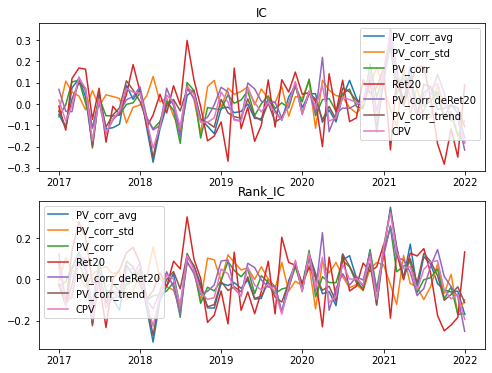

In [5]:
# 计算各因子IC值
from scipy.stats import spearmanr
import dtale
import matplotlib.pyplot as plt
ic_df = pd.DataFrame(index=fac_dict1.keys())
r_ic_df = pd.DataFrame(index=fac_dict1.keys())
for date in ic_df.index:
    temp = fac_dict1[date].dropna()
    for fac in temp.columns[:7]:
        ic_df.loc[date, fac] = temp.corr().loc[fac, 'next_return']
        r_ic_df.loc[date, fac] = spearmanr(temp.loc[:, fac], temp['next_return'])[0]

# dtale.show(r_ic_df, open_browser=True)
ir = ic_df.mean() / ic_df.std()
r_ir = r_ic_df.mean() / r_ic_df.std()
print('The monthly mean of the IC, and IR of the time: ')
print(pd.concat([ic_df.mean().to_frame('IC'), ir.to_frame('IR')], axis=1))
print()
print(pd.concat([r_ic_df.mean().to_frame('Rank IC'), r_ir.to_frame('Rank IR')], axis=1))

# plot
%matplotlib inline
ic_df.index = pd.to_datetime(ic_df.index)
r_ic_df.index = pd.to_datetime(r_ic_df.index)
# # print(ic_df)
# # plt.plot(ic_df.index, ic_df.iloc[:, 0].values)
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(211)
ax1.plot(ic_df)
plt.title('IC')
plt.legend(ic_df.columns)
ax2 = fig.add_subplot(212)
ax2.plot(r_ic_df)
plt.title('Rank_IC')
plt.legend(r_ic_df.columns)
# ic_df.plot()
# plt.legend()
plt.show()